In [ ]:
%matplotlib inline
import math
import torch
import torchvision.models as models
import pickle
import numpy as np
import numpy.linalg as LA
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import Normalize

In [2]:
# model = torch.load('./s3_att_best-after111.pth.tar')
# torch.save(model['state_dict'], './s3_params.pkl')

In [5]:
param =  torch.load ('./s3_params.pkl')

In [26]:
blocks = 4
layer_num = 6
channels = 40
list_channels = [0, 40, 80, 160, 160]

l1_Or_l2 = 1

[[ 0.92972324  0.92643973  1.          0.86360595  0.78939679  0.71768716]
 [        nan  0.70632985  0.59591857  0.8124101   0.73927715  0.86935137]
 [ 0.77289985         nan  0.73936505  0.81518505  0.5837325   0.70490129]
 [ 0.83883403  0.84694578         nan  0.80305876  0.29294829  0.85404834]
 [ 0.66396299  0.65406375  0.91102041         nan  0.78421816  0.75550465]
 [ 0.65492823  0.77924466  0.10313307  0.78957419         nan  0.76062571]
 [ 0.63524015  0.41768093  0.00536605  0.60579865  0.7140334          nan]]
[[ 0.92972324  0.92643973  1.          0.86360595  0.78939679  0.71768716]
 [ 1.          0.70632985  0.59591857  0.8124101   0.73927715  0.86935137]
 [ 0.77289985  1.          0.73936505  0.81518505  0.5837325   0.70490129]
 [ 0.83883403  0.84694578  1.          0.80305876  0.29294829  0.85404834]
 [ 0.66396299  0.65406375  0.91102041  1.          0.78421816  0.75550465]
 [ 0.65492823  0.77924466  0.10313307  0.78957419  1.          0.76062571]
 [ 0.63524015  0.4176809

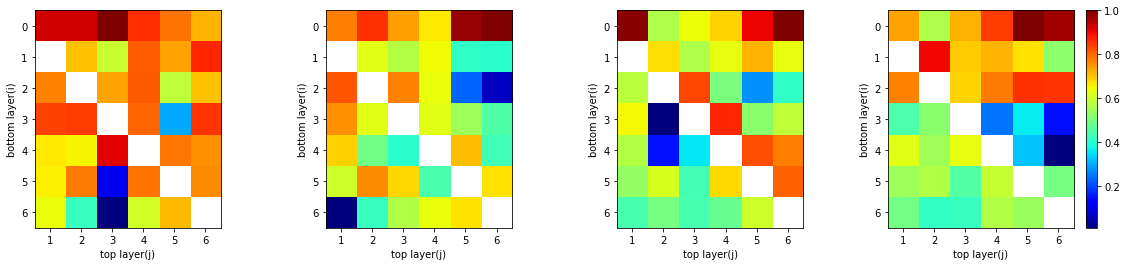

In [106]:
l1_Or_l2 = 2
blocks = 4
fig = plt.figure(figsize=(20,4))
for k in range(1, blocks+1):
    if(k == 1):
        max = 1.40776179556
        min = 0.2540
    elif(k == 2):
        max = 1.48651971155
        min = 0.5973
    elif(k == 3):
        max = 1.67049896791
        min = 0.6341
    elif(k == 4):
        max = 0.900682518261
        min = 0.4267
    
    block1 = np.ones((layer_num + 1, layer_num + 1))
    for j in range(1, layer_num+1):
        for i in range(0, j):
            block1[i, j] = math.sqrt((LA.norm(np.array(param['module.block%d.conv_param.%d.weight' % (k, i * (layer_num + 1)+j)].tolist()).reshape([list_channels[k], -1]), l1_Or_l2) - min)/(max-min))
            #     block1[i, j] = param['module.block1.conv_param.%d.weight' % i*(layer_num+1)+j].reshape()
                # print(i, " ", j, " ", i*layer_num+j)
                # block1[k-1][j-1] = LA.norm(np.array(model['features.denseblock1.denselayer%d.conv.1.weight' % j][:, 0:64, :, :].tolist()).reshape([128, -1]), l1_Or_l2)
        for i in range(j+1, layer_num+1):
            block1[i, j] = math.sqrt((LA.norm(np.array(param['module.block%d.conv_param.%d.weight' % (k, i * (layer_num + 1)+j)].tolist()).reshape([list_channels[k], -1]), l1_Or_l2) - min)/(max-min))
                # block1[k-1][j-1] = LA.norm(np.array(model['features.denseblock1.denselayer%d.conv.1.weight' % j][:, 0:64, :, :].tolist()).reshape([128, -1]), l1_Or_l2)
        block1[j, j] = None

#     block1 = block1[:, 1:layer_num+1]

    # for i in range(0, layer_num+1):
    #     block1[i, 0] = None

    ax = plt.subplot(1, 4, k)
    cax = ax.imshow(block1, cmap = 'jet')  #, vmin=0, vmax=1
#     fig.colorbar(cax)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1On = True
        tick.label2On = False
    for tick in ax.yaxis.get_major_ticks():
        tick.label1On = True
        tick.label2On = False
    
    plt.xlim((0.5, 6.5))    
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.xlabel('top layer(j)')
    plt.ylabel('bottom layer(i)')
    
    if(k==blocks):
        fig.colorbar(cax)

    block1 = block1[:, 1:layer_num+1]
    print(block1)
    block1[np.isnan(block1)] = block1[0,2]
    print(block1)
    print(block1.max())
    print(block1.min())
# 1.40776179556
# 0.254033222004

# 1.48651971155
# 0.59735456914

# 1.67049896791
# 0.634171267408

# 0.900682518261
# 0.426728818146

plt.show()
# plt.savefig("./blocks_l%d.png" % (l1_Or_l2))
# plt.savefig("./block%d_l%d.png" % (k, l1_Or_l2))

In [107]:
fig.savefig("./processed_blocks_l%d.pdf" % (l1_Or_l2))

[[ 1.54131795  1.92562678  1.88843244  1.4811937   1.52579933  1.53601649]
 [        nan  1.61918508  1.39598588  1.67466561  1.32630538  1.56286693]
 [ 1.50496859         nan  1.43578138  1.50437364  1.30474345  1.61305001]
 [ 1.74944631  1.61816455         nan  1.439146    0.93633319  1.51665168]
 [ 1.33812992  1.21650942  1.71143699         nan  1.69499352  1.18518894]
 [ 1.17129101  1.28849248  0.86439956  1.36718105         nan  1.22994072]
 [ 1.2992943   1.08062628  0.88258194  1.20038805  1.39131512         nan]]
[[ 1.54131795  1.92562678  1.88843244  1.4811937   1.52579933  1.53601649]
 [ 1.88843244  1.61918508  1.39598588  1.67466561  1.32630538  1.56286693]
 [ 1.50496859  1.88843244  1.43578138  1.50437364  1.30474345  1.61305001]
 [ 1.74944631  1.61816455  1.88843244  1.439146    0.93633319  1.51665168]
 [ 1.33812992  1.21650942  1.71143699  1.88843244  1.69499352  1.18518894]
 [ 1.17129101  1.28849248  0.86439956  1.36718105  1.88843244  1.22994072]
 [ 1.2992943   1.0806262

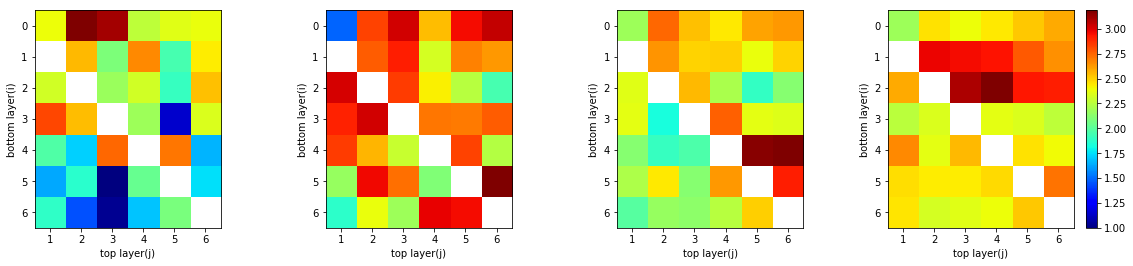

In [108]:
l1_Or_l2 = 1
blocks = 4
fig = plt.figure(figsize=(20,4))
for k in range(1, blocks+1):
    if(k == 1):
        max = 1.40776179556
        min = 0.2540
    elif(k == 2):
        max = 1.48651971155
        min = 0.5973
    elif(k == 3):
        max = 1.67049896791
        min = 0.6341
    elif(k == 4):
        max = 0.900682518261
        min = 0.4267
    
    block1 = np.ones((layer_num + 1, layer_num + 1))
    for j in range(1, layer_num+1):
        for i in range(0, j):
            block1[i, j] = math.sqrt((LA.norm(np.array(param['module.block%d.conv_param.%d.weight' % (k, i * (layer_num + 1)+j)].tolist()).reshape([list_channels[k], -1]), l1_Or_l2) - min)/(max-min))
            #     block1[i, j] = param['module.block1.conv_param.%d.weight' % i*(layer_num+1)+j].reshape()
                # print(i, " ", j, " ", i*layer_num+j)
                # block1[k-1][j-1] = LA.norm(np.array(model['features.denseblock1.denselayer%d.conv.1.weight' % j][:, 0:64, :, :].tolist()).reshape([128, -1]), l1_Or_l2)
        for i in range(j+1, layer_num+1):
            block1[i, j] = math.sqrt((LA.norm(np.array(param['module.block%d.conv_param.%d.weight' % (k, i * (layer_num + 1)+j)].tolist()).reshape([list_channels[k], -1]), l1_Or_l2) - min)/(max-min))
                # block1[k-1][j-1] = LA.norm(np.array(model['features.denseblock1.denselayer%d.conv.1.weight' % j][:, 0:64, :, :].tolist()).reshape([128, -1]), l1_Or_l2)
        block1[j, j] = None

#     block1 = block1[:, 1:layer_num+1]

    # for i in range(0, layer_num+1):
    #     block1[i, 0] = None

    ax = plt.subplot(1, 4, k)
    cax = ax.imshow(block1, cmap = 'jet')  #, vmin=0, vmax=1
#     fig.colorbar(cax)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1On = True
        tick.label2On = False
    for tick in ax.yaxis.get_major_ticks():
        tick.label1On = True
        tick.label2On = False
    
    plt.xlim((0.5, 6.5))    
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.xlabel('top layer(j)')
    plt.ylabel('bottom layer(i)')
    
    if(k==blocks):
        fig.colorbar(cax)

    block1 = block1[:, 1:layer_num+1]
    print(block1)
    block1[np.isnan(block1)] = block1[0,2]
    print(block1)
    print(block1.max())
    print(block1.min())
# 1.40776179556
# 0.254033222004

# 1.48651971155
# 0.59735456914

# 1.67049896791
# 0.634171267408

# 0.900682518261
# 0.426728818146

plt.show()

In [109]:
fig.savefig("./processed_blocks_l%d.pdf" % (l1_Or_l2))